In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

warnings.filterwarnings('ignore')

In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
# 윈도우용 한글깨짐 방지
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [128]:
aa = pd.read_csv("./totalData6.csv",encoding="CP949")
bb = pd.read_csv("./totalData4.csv",encoding="CP949")

In [129]:
aa.head()

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,최고기온,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령
0,14,종로구,5021,0.918144,103,165344,6914,26,1083,6.90,...,35.8,18.3,-13.2,9.3,2.6,19.4,808.9,360,8351,42.5
1,14,중구,5231,0.609444,77,136227,13677,20,985,6.56,...,34.0,17.4,-13.8,8.5,2.0,22.3,702.5,358,8162,42.9
2,14,용산구,3799,0.615952,68,249914,11428,13,655,6.72,...,35.4,18.5,-11.7,10.1,1.8,18.1,718.5,156,13963,41.8
3,14,성동구,3582,0.571748,110,303891,18028,16,613,6.90,...,34.2,18.0,-10.5,10.5,2.1,24.3,916.5,77,7805,40.5
4,14,광진구,6268,0.563338,176,377375,22117,11,653,6.74,...,35.4,18.5,-11.2,10.2,1.7,19.9,852.5,108,14021,39.5


In [130]:
aa.shape

(225, 24)

In [131]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연도        225 non-null    int64  
 1   자치구       225 non-null    object 
 2   발생        225 non-null    int64  
 3   검거율       225 non-null    float64
 4   cctv      225 non-null    int64  
 5   인구        225 non-null    int64  
 6   인구밀도      225 non-null    int64  
 7   파출소현황     225 non-null    int64  
 8   경찰관       225 non-null    int64  
 9   행복지수      225 non-null    float64
 10  월간 음주율    225 non-null    float64
 11  우울감 경험률   225 non-null    float64
 12  지가변동평균    225 non-null    float64
 13  평균기온      225 non-null    float64
 14  최고기온      225 non-null    float64
 15  평균최고기온    225 non-null    float64
 16  최저기온      225 non-null    float64
 17  평균최저기온    225 non-null    float64
 18  평균풍속      225 non-null    float64
 19  최대 순간 풍속  225 non-null    float64
 20  강수량합      225 non-null    float6

In [132]:
bb.index
df = pd.DataFrame(zip(bb["자치구"]))
df.rename(columns={0:"자치구"},inplace =True)

# 이 바로 밑에거는 전체를 실행하는거라 본인이 맡은 부분만 data_list에 넣어주시면 이거는 따로 실행할 필요 없어요

In [133]:
data = []
aa.columns
for i in bb.columns[1:]:
    data.append(i[3:])
# data
data_set = set(data)
data_set
data_list = list(data_set)
print(data_list)
print(len(data_list)) # data_list 14~22년도를 한 번에 묶은 리스트 


['발생', '외국인 인구수', '최대 순간 풍속', 'cctv', '평균최고기온', '인구', '최고기온', '평균 풍속', '파출소현황', '행복지수', '우울감 경험률', '평균연령', '유흥주점', '검거율', '강수량합', '인구밀도', '월간 음주율', '평균최저기온', '평균기온', '최저기온', '지가변동평균', '경찰관']
22


In [134]:
df_list = [] 
for i in data_list[2:]:
    df = pd.DataFrame(zip(bb["자치구"]))
    df.rename(columns={0:"자치구"},inplace =True) 
    for j in range(14,23):
        df = pd.concat([df,bb.loc[:,f"{j}'{i}"].to_frame()],axis=1)
    df.set_index("자치구",inplace = True)
    df_list.append(df)

In [135]:
df_list[0]

,14'최대 순간 풍속,15'최대 순간 풍속,16'최대 순간 풍속,17'최대 순간 풍속,18'최대 순간 풍속,19'최대 순간 풍속,20'최대 순간 풍속,21'최대 순간 풍속,22'최대 순간 풍속
자치구,,,,,,,,,
종로구,19.40,23.20,21.70,22.50,15.80,17.275,18.675,18.35,17.925
중구,22.30,15.10,14.60,13.80,15.10,16.100,22.800,23.30,21.600
용산구,18.10,15.30,16.20,17.10,16.90,16.100,18.100,20.70,18.400
성동구,24.30,18.40,20.40,18.10,21.60,27.900,20.600,17.90,19.900
광진구,19.90,14.80,17.20,11.60,11.90,14.000,12.000,11.90,12.400
동대문구,22.00,18.20,18.50,18.30,20.80,24.200,19.700,25.60,20.300
중랑구,19.80,18.00,18.40,19.30,23.20,27.600,18.000,17.60,16.400
성북구,19.60,17.20,21.40,18.10,21.50,25.000,21.300,18.20,18.800
강북구,20.00,20.80,24.00,17.80,18.40,26.000,25.200,20.00,16.700


# show_plt_part는 본인이 원하는 구들만 보고 싶으시면  data_list에 밑에 보이는 a변수처럼 추가하시고 실행하면 됩니다 
- 여기 i 바꿔주셔야 다른 그래프 그려집니다

In [136]:
def show_plt_part(data_list,i=0):
    fig = plt.figure(figsize = (15,8))
    plt.plot(df_list[i].loc[data_list].T,"D-")
    plt.legend(data_list,loc="upper right")
    plt.title("연도별 흐름")
    plt.xlabel("연도")
    plt.ylabel("수")
    plt.grid(True)
    plt.show()

In [137]:
a = ["마포구","서대문구","강서구","영등포구","용산구","은평구","중구"]

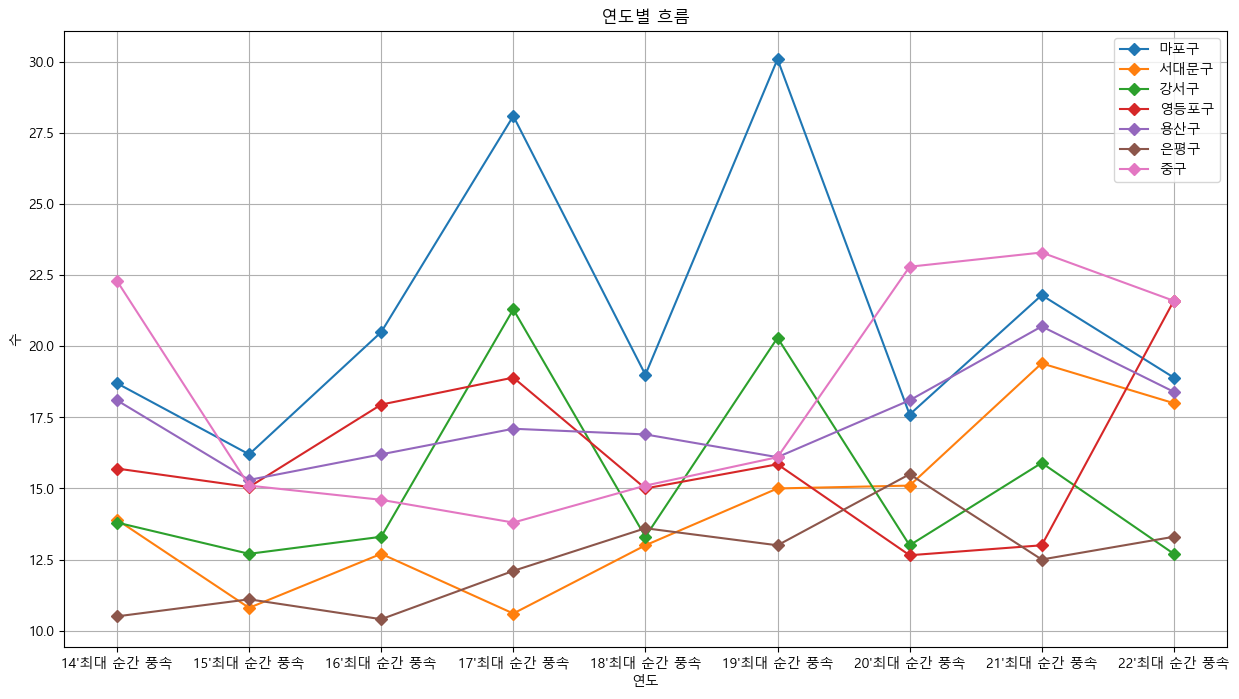

In [138]:
show_plt_part(a)

# show_plt 이거는 전체구를 판단, i는 기본 0이여서 바꿔주셔야 다른 그래프 그려집니다.

In [139]:
def show_plt(i=0):
    fig = plt.figure(figsize = (15,8))
    plt.plot(df_list[i].T,"D-")
    plt.legend(df_list[i].T.columns,loc="upper right")
    plt.title("연도별 흐름")
    plt.xlabel("연도")
    plt.ylabel("수")
    plt.grid(True)
    plt.show()

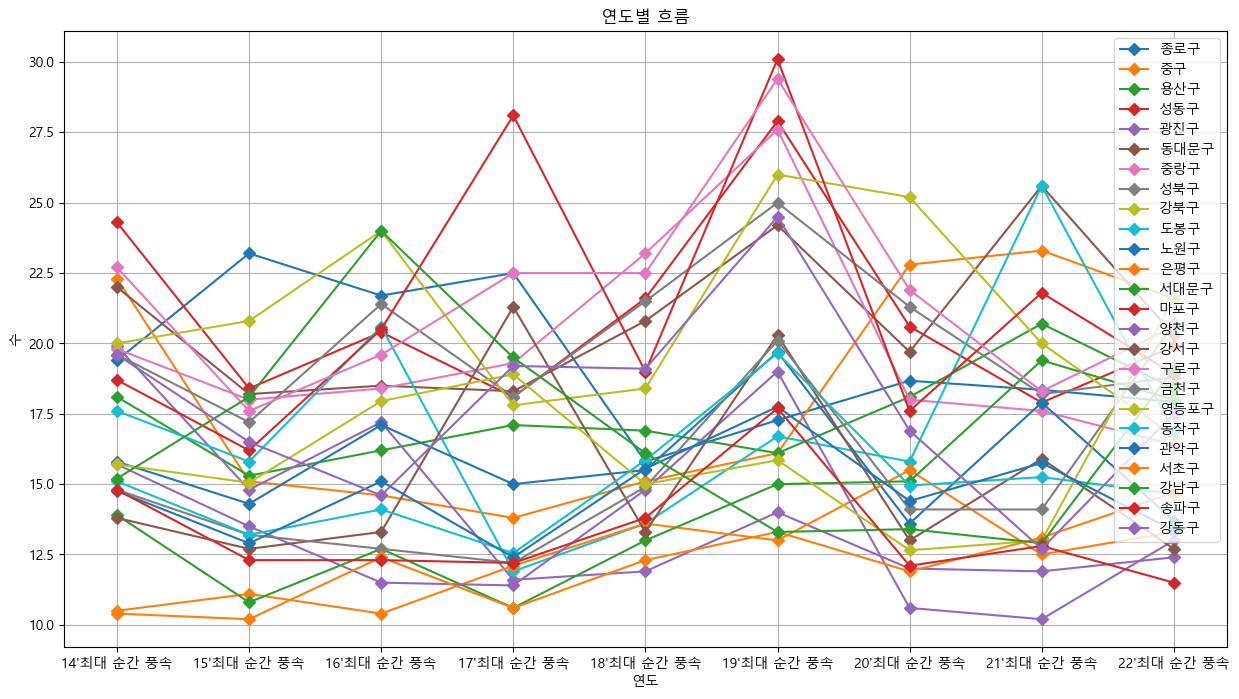

In [140]:
show_plt()

# 데이터 상관분석

In [141]:
correlation_matrix = aa.corr()

# 히트맵 그리기
plt.figure(figsize=(50, 50), dpi = 120)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: '종로구'

# 데이터 스케일링

In [142]:
pd.options.mode.chained_assignment = None

In [143]:
scale_col = aa.columns[3:].tolist()

In [144]:
##scale_col.remove("발생")

In [145]:
aa[scale_col].head()

,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,우울감 경험률,지가변동평균,...,최고기온,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령
0,0.918144,103,165344,6914,26,1083,6.90,55.7,9.0,2.410,...,35.8,18.3,-13.2,9.3,2.6,19.4,808.9,360,8351,42.5
1,0.609444,77,136227,13677,20,985,6.56,61.2,8.6,2.563,...,34.0,17.4,-13.8,8.5,2.0,22.3,702.5,358,8162,42.9
2,0.615952,68,249914,11428,13,655,6.72,57.6,9.5,1.491,...,35.4,18.5,-11.7,10.1,1.8,18.1,718.5,156,13963,41.8
3,0.571748,110,303891,18028,16,613,6.90,64.8,9.1,1.848,...,34.2,18.0,-10.5,10.5,2.1,24.3,916.5,77,7805,40.5
4,0.563338,176,377375,22117,11,653,6.74,56.0,7.5,1.822,...,35.4,18.5,-11.2,10.2,1.7,19.9,852.5,108,14021,39.5


In [146]:
aa_ss=StandardScaler()

In [147]:
scaled_aa=aa_ss.fit_transform(aa[scale_col])

In [148]:
scaled_aa

array([[ 2.38214057, -1.07708732, -1.87259119, ...,  1.55759012,
        -0.2788587 ,  0.0544702 ],
       [-1.12356173, -1.17863546, -2.10332913, ...,  1.53996412,
        -0.30237117,  0.2835505 ],
       [-1.04965622, -1.21378674, -1.20241543, ..., -0.24026198,
         0.41929988, -0.34642031],
       ...,
       [ 0.16163921,  0.3484924 ,  1.04964297, ...,  1.72503713,
        -0.72584441, -0.06006994],
       [-0.55210875,  0.20398158,  2.08308617, ...,  0.36783505,
        -0.61773682,  0.11174028],
       [ 0.04651256,  0.19617018,  0.4944043 , ...,  0.05938004,
        -0.84402878,  0.56990086]])

In [149]:
scaled_aa_df=pd.DataFrame(scaled_aa,columns=scale_col)

In [150]:
scaled_aa_df.head()

,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,월간 음주율,우울감 경험률,지가변동평균,...,최고기온,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령
0,2.382141,-1.077087,-1.872591,-2.212221,1.890542,1.202474,0.419540,-0.407363,1.023729,-1.006389,...,-0.504476,-0.081296,0.326689,0.078170,2.487887,0.596616,-1.024456,1.557590,-0.278859,0.054470
1,-1.123562,-1.178635,-2.103329,-0.792670,0.471058,0.720479,-0.695250,0.719648,0.829514,-0.899893,...,-1.685135,-1.793164,0.131153,-0.559474,0.916957,1.307100,-1.345123,1.539964,-0.302371,0.283550
2,-1.049656,-1.213787,-1.202415,-1.264734,-1.185006,-0.902566,-0.170643,-0.018032,1.266498,-1.646059,...,-0.766845,0.299119,0.815527,0.715814,0.393314,0.278123,-1.296902,-0.240262,0.419300,-0.346420
3,-1.551651,-1.049747,-0.774674,0.120604,-0.475264,-1.109135,0.419540,1.457328,1.072283,-1.397569,...,-1.553950,-0.651919,1.206597,1.034636,1.178779,1.797089,-0.700172,-0.936489,-0.346784,-1.090931
4,-1.647158,-0.791971,-0.192350,0.978883,-1.658167,-0.912402,-0.105067,-0.345890,0.295423,-1.415666,...,-0.766845,0.299119,0.978473,0.795520,0.131493,0.719113,-0.893054,-0.663286,0.426515,-1.663632


In [151]:
scaled_aa_df=pd.concat([aa[["연도","자치구","발생"]],scaled_aa_df],axis=1)

In [152]:
scaled_aa_df

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,최고기온,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령
0,14,종로구,5021,2.382141,-1.077087,-1.872591,-2.212221,1.890542,1.202474,0.419540,...,-0.504476,-0.081296,0.326689,0.078170,2.487887,0.596616,-1.024456,1.557590,-0.278859,0.054470
1,14,중구,5231,-1.123562,-1.178635,-2.103329,-0.792670,0.471058,0.720479,-0.695250,...,-1.685135,-1.793164,0.131153,-0.559474,0.916957,1.307100,-1.345123,1.539964,-0.302371,0.283550
2,14,용산구,3799,-1.049656,-1.213787,-1.202415,-1.264734,-1.185006,-0.902566,-0.170643,...,-0.766845,0.299119,0.815527,0.715814,0.393314,0.278123,-1.296902,-0.240262,0.419300,-0.346420
3,14,성동구,3582,-1.551651,-1.049747,-0.774674,0.120604,-0.475264,-1.109135,0.419540,...,-1.553950,-0.651919,1.206597,1.034636,1.178779,1.797089,-0.700172,-0.936489,-0.346784,-1.090931
4,14,광진구,6268,-1.647158,-0.791971,-0.192350,0.978883,-1.658167,-0.912402,-0.105067,...,-0.766845,0.299119,0.978473,0.795520,0.131493,0.719113,-0.893054,-0.663286,0.426515,-1.663632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,22,관악구,4879,-0.105183,-0.952105,0.789109,-0.105458,0.234478,0.523746,-0.137855,...,-1.422766,-2.363787,-0.096971,-1.595645,0.655136,-0.885601,2.023539,0.764420,0.392802,0.398091
221,22,서초구,4459,-0.154515,1.942017,0.053913,-1.838180,0.707639,1.492654,0.616268,...,-0.307700,0.299119,0.489635,-0.240652,-0.392151,-0.554858,2.470333,-0.504652,-0.834076,-0.174610
222,22,강남구,6947,0.161639,0.348492,1.049643,-0.825204,1.180800,3.784590,-1.383797,...,0.151445,0.869742,0.457046,-0.001535,-0.130329,0.523118,1.689762,1.725037,-0.725844,-0.060070
223,22,송파구,5167,-0.552109,0.203982,2.083086,0.453924,0.944220,1.207392,0.944147,...,0.085853,0.299119,0.391867,0.715814,-0.130329,-1.338840,2.413071,0.367835,-0.617737,0.111740


# 원핫 인코딩

In [153]:
aa["자치구"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [154]:
ohe=OneHotEncoder()

In [155]:
gu_arr=np.array(aa["자치구"])

In [156]:
gu_arr=np.reshape(gu_arr,(-1,1))

In [157]:
gu_arr

array([['종로구'],
       ['중구'],
       ['용산구'],
       ['성동구'],
       ['광진구'],
       ['동대문구'],
       ['중랑구'],
       ['성북구'],
       ['강북구'],
       ['도봉구'],
       ['노원구'],
       ['은평구'],
       ['서대문구'],
       ['마포구'],
       ['양천구'],
       ['강서구'],
       ['구로구'],
       ['금천구'],
       ['영등포구'],
       ['동작구'],
       ['관악구'],
       ['서초구'],
       ['강남구'],
       ['송파구'],
       ['강동구'],
       ['종로구'],
       ['중구'],
       ['용산구'],
       ['성동구'],
       ['광진구'],
       ['동대문구'],
       ['중랑구'],
       ['성북구'],
       ['강북구'],
       ['도봉구'],
       ['노원구'],
       ['은평구'],
       ['서대문구'],
       ['마포구'],
       ['양천구'],
       ['강서구'],
       ['구로구'],
       ['금천구'],
       ['영등포구'],
       ['동작구'],
       ['관악구'],
       ['서초구'],
       ['강남구'],
       ['송파구'],
       ['강동구'],
       ['종로구'],
       ['중구'],
       ['용산구'],
       ['성동구'],
       ['광진구'],
       ['동대문구'],
       ['중랑구'],
       ['성북구'],
       ['강북구'],
       ['도봉구'],
       ['노원구'],
       ['은평구'],
    

In [158]:
ohe_gu=ohe.fit_transform(gu_arr)

In [159]:
ohe_gu

<225x25 sparse matrix of type '<class 'numpy.float64'>'
	with 225 stored elements in Compressed Sparse Row format>

In [160]:
ohe.get_feature_names_out()

array(['x0_강남구', 'x0_강동구', 'x0_강북구', 'x0_강서구', 'x0_관악구', 'x0_광진구',
       'x0_구로구', 'x0_금천구', 'x0_노원구', 'x0_도봉구', 'x0_동대문구', 'x0_동작구',
       'x0_마포구', 'x0_서대문구', 'x0_서초구', 'x0_성동구', 'x0_성북구', 'x0_송파구',
       'x0_양천구', 'x0_영등포구', 'x0_용산구', 'x0_은평구', 'x0_종로구', 'x0_중구',
       'x0_중랑구'], dtype=object)

In [161]:
type(ohe_gu)

scipy.sparse._csr.csr_matrix

In [163]:
ohe_gu_df=pd.DataFrame(ohe_gu.toarray(),columns=ohe.get_feature_names_out())

In [165]:
ohe_aa_df=pd.concat([aa,ohe_gu_df],axis=1)

In [166]:
ohe_aa_df.head()

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,x0_성동구,x0_성북구,x0_송파구,x0_양천구,x0_영등포구,x0_용산구,x0_은평구,x0_종로구,x0_중구,x0_중랑구
0,14,종로구,5021,0.918144,103,165344,6914,26,1083,6.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,14,중구,5231,0.609444,77,136227,13677,20,985,6.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14,용산구,3799,0.615952,68,249914,11428,13,655,6.72,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,14,성동구,3582,0.571748,110,303891,18028,16,613,6.90,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,광진구,6268,0.563338,176,377375,22117,11,653,6.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 범죄 발생과의 상관계수

In [167]:
# 자치구별로 그룹화를 하고, Feature들을 정리
jachi_grouped_df_dict = dict(list(aa.groupby(['자치구'])))
feature_names = aa.columns.tolist()

In [168]:
# 피처들의 단위 맞춰주기
pd.options.mode.chained_assignment = None

scaler=StandardScaler()
occ_scaler=StandardScaler()

In [169]:
# jachi_grouped는 자치구별 그룹화된 Feature 
# Occurance는 범죄발생 수 (occ)
scaled_jachi_grouped_dict = {}
scaled_occurance_dict= {}
occurance_dict = {}

simple_scaler_dict = {}
scaler_dict = {}


for key in jachi_grouped_df_dict.keys():
    jachi_gu_name = str(key)[2:-3]
    
    simple_scaler_dict[jachi_gu_name] = StandardScaler()
    scaler_dict[jachi_gu_name] = StandardScaler()

    # 4번째 열부터 Feature에 해당. 3번째 Feature는 범죄 발생 수
    features = jachi_grouped_df_dict[key].iloc[:,3:].values
    occurance = jachi_grouped_df_dict[key].iloc[:,2].values.reshape(-1, 1)

    # Feature 및 범죄 발생 수를 정규화
    # 자치구별 인구수가 다른 등의 현상을 다루기 위해 자치구별로 정규화
    scaled_jachi_grouped_dict[jachi_gu_name] = scaler_dict[jachi_gu_name].fit_transform(features)
    scaled_occurance_dict[jachi_gu_name] = simple_scaler_dict[jachi_gu_name].fit_transform(occurance)
    scaled_occurance_dict[jachi_gu_name] = scaled_occurance_dict[jachi_gu_name].flatten()
    

In [170]:
simple_scaler_dict

{'강남구': StandardScaler(),
 '강동구': StandardScaler(),
 '강북구': StandardScaler(),
 '강서구': StandardScaler(),
 '관악구': StandardScaler(),
 '광진구': StandardScaler(),
 '구로구': StandardScaler(),
 '금천구': StandardScaler(),
 '노원구': StandardScaler(),
 '도봉구': StandardScaler(),
 '동대문구': StandardScaler(),
 '동작구': StandardScaler(),
 '마포구': StandardScaler(),
 '서대문구': StandardScaler(),
 '서초구': StandardScaler(),
 '성동구': StandardScaler(),
 '성북구': StandardScaler(),
 '송파구': StandardScaler(),
 '양천구': StandardScaler(),
 '영등포구': StandardScaler(),
 '용산구': StandardScaler(),
 '은평구': StandardScaler(),
 '종로구': StandardScaler(),
 '중구': StandardScaler(),
 '중랑구': StandardScaler()}

In [171]:
Correlation_occurance_dict = {}

# 범죄 발생수에 대해 Feature의 상관관계를 계산 
# 이 때 자치구별 특성이 다르므로 자치구별 상관관계를 계산
for key in scaled_jachi_grouped_dict.keys():
    concated_temp = np.concatenate((scaled_jachi_grouped_dict[key], 
                                    scaled_occurance_dict[key].reshape(-1,1)),axis=1)
    Correlation_occurance_dict[key] = np.corrcoef(concated_temp, rowvar=False)[-1]

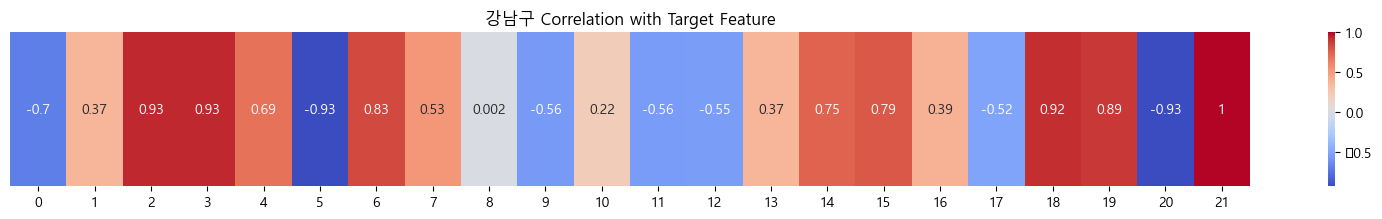

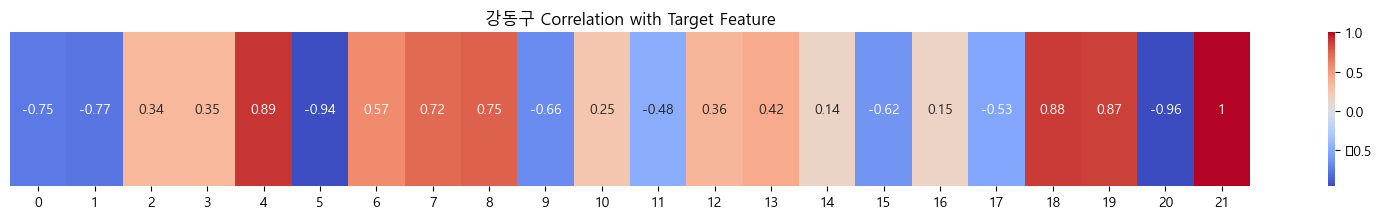

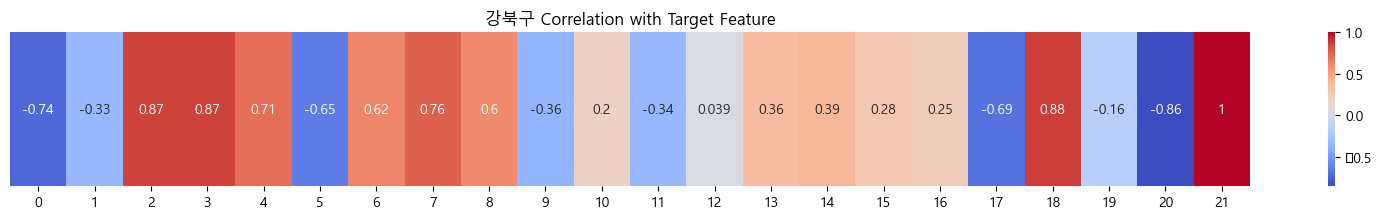

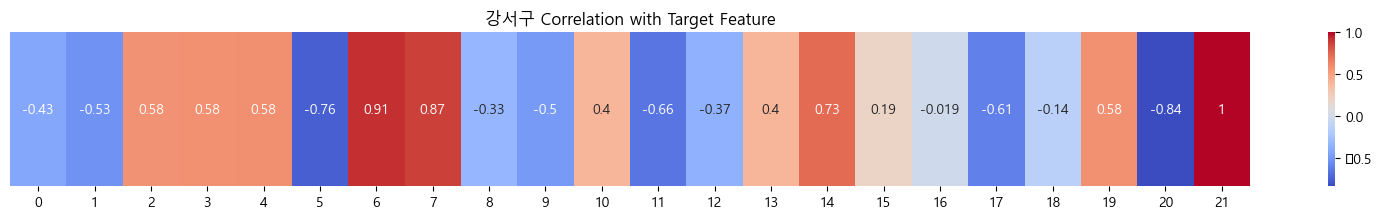

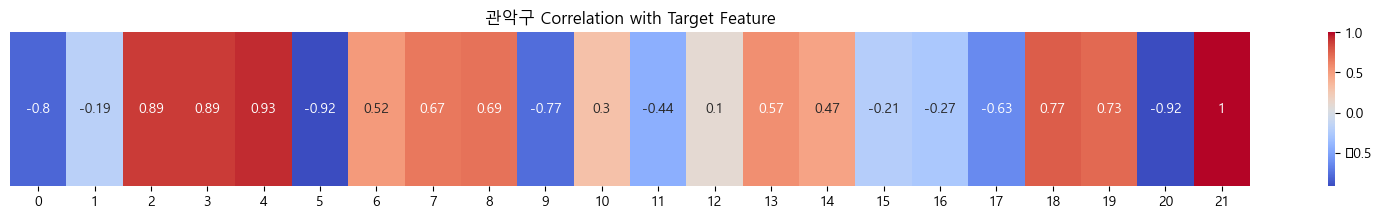

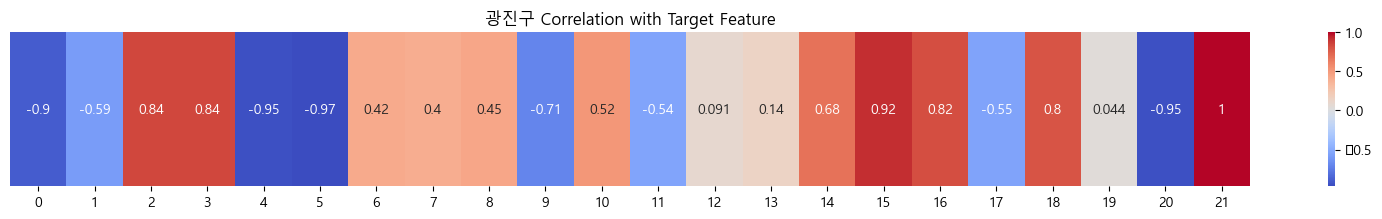

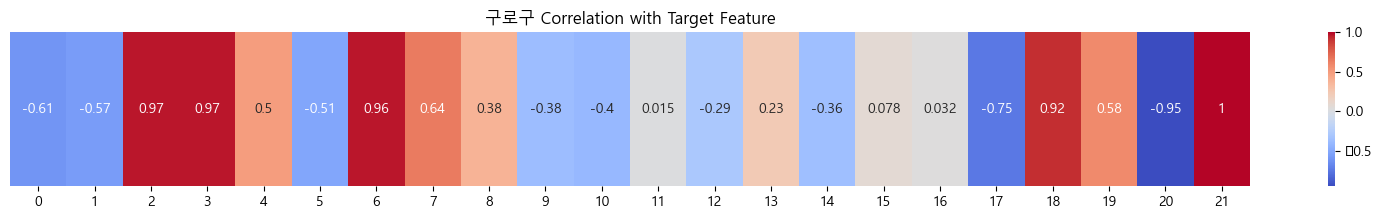

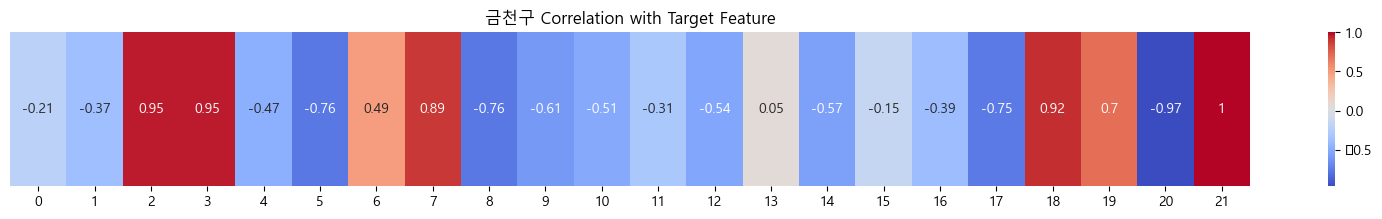

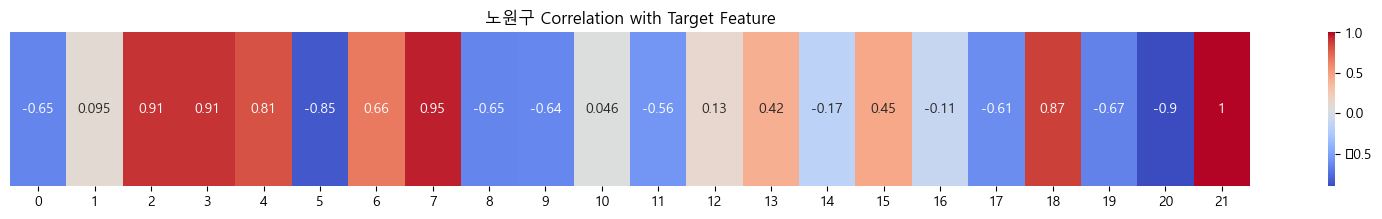

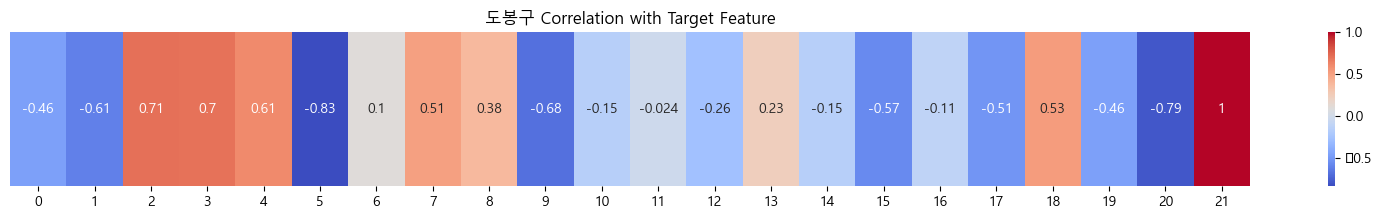

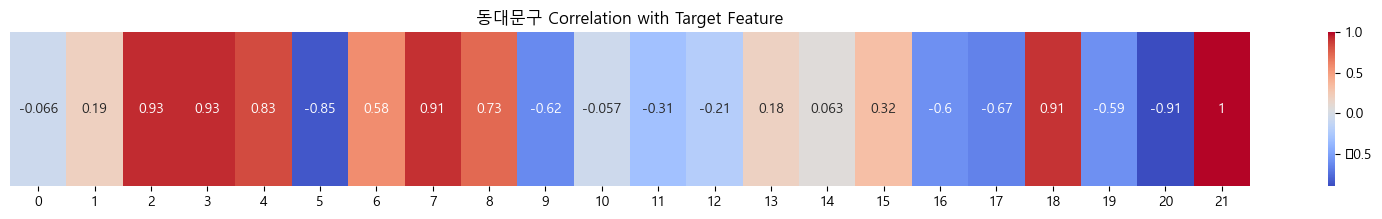

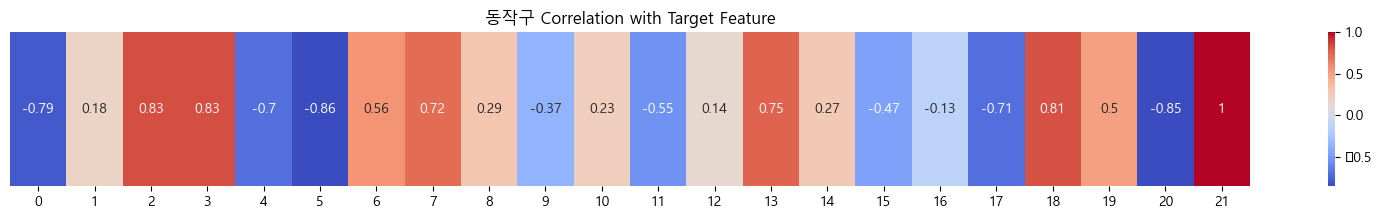

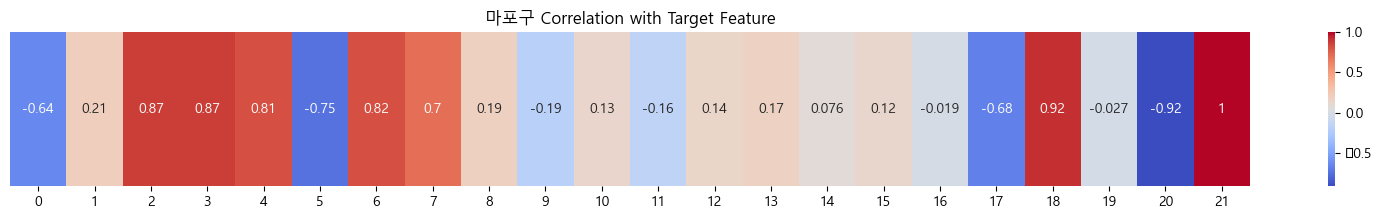

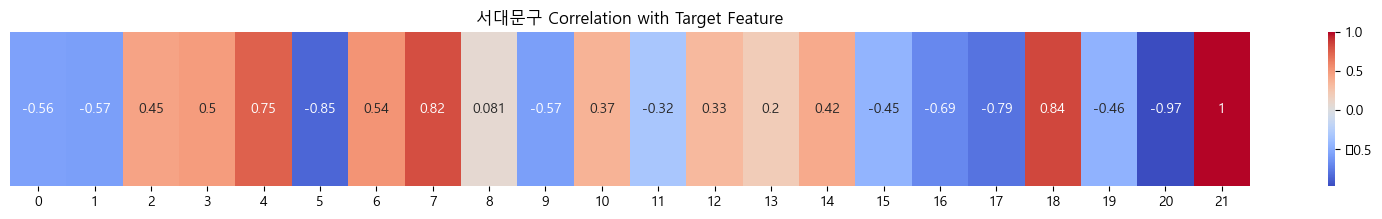

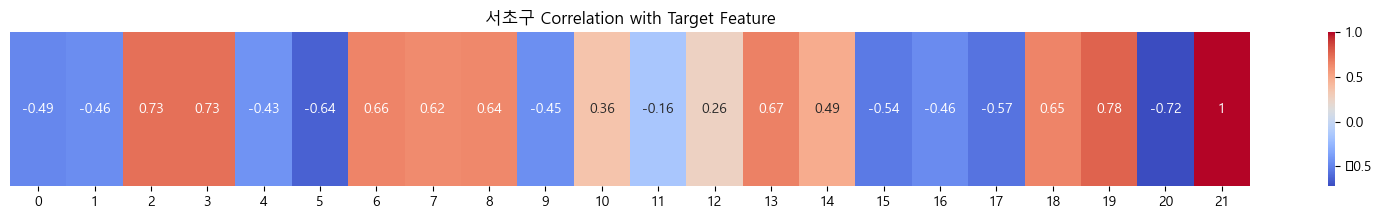

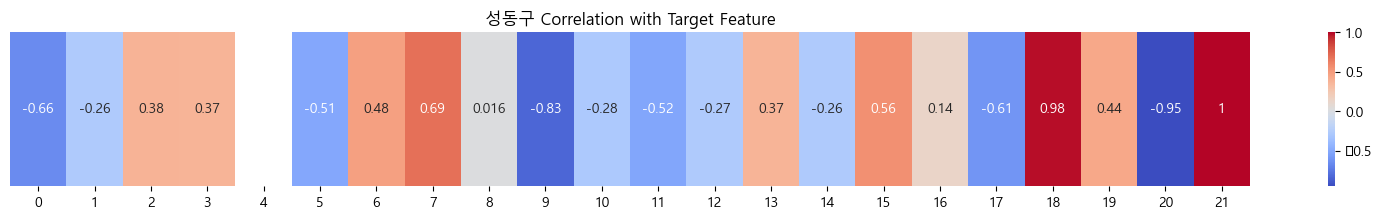

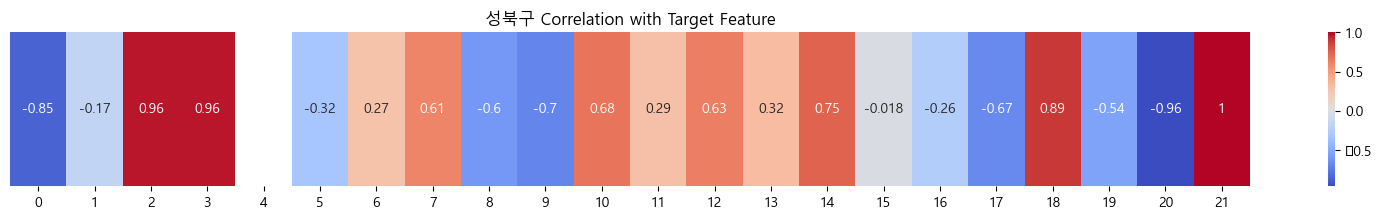

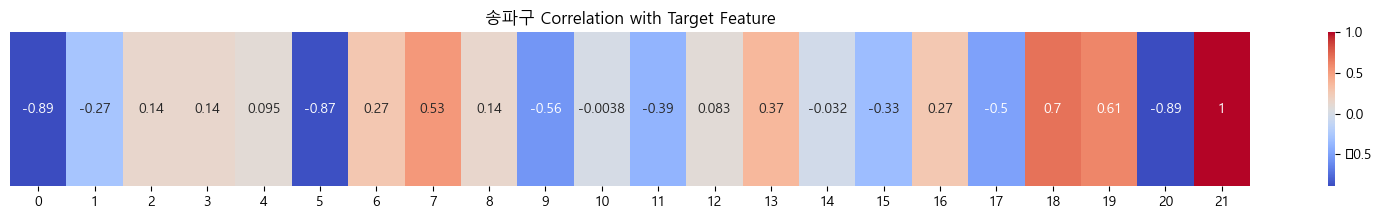

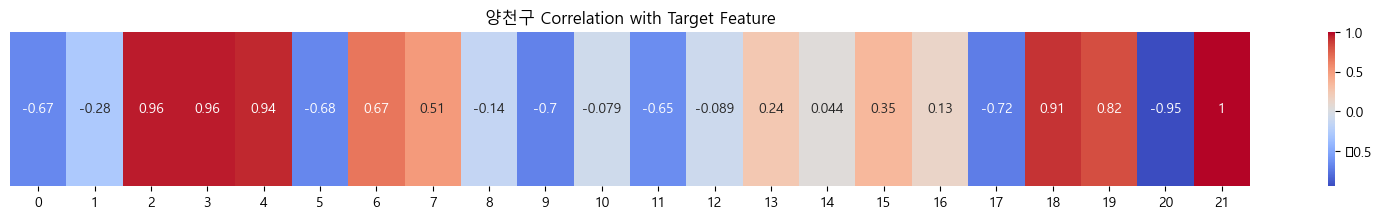

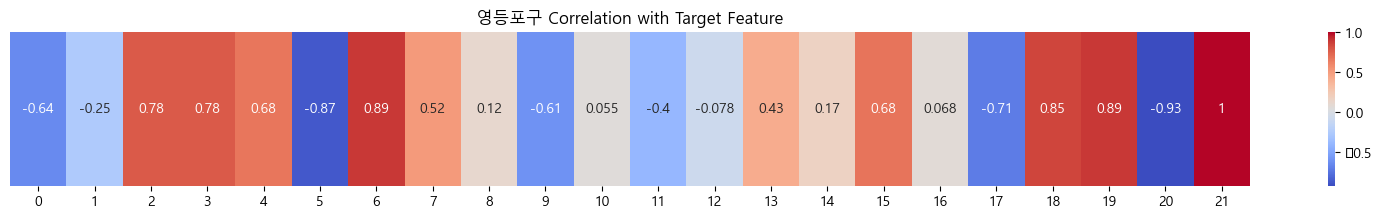

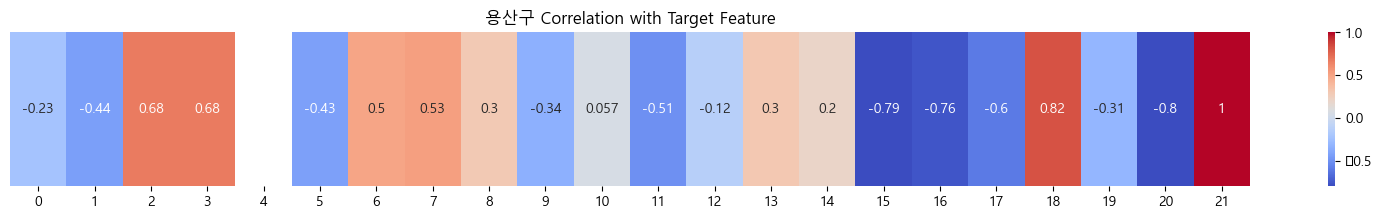

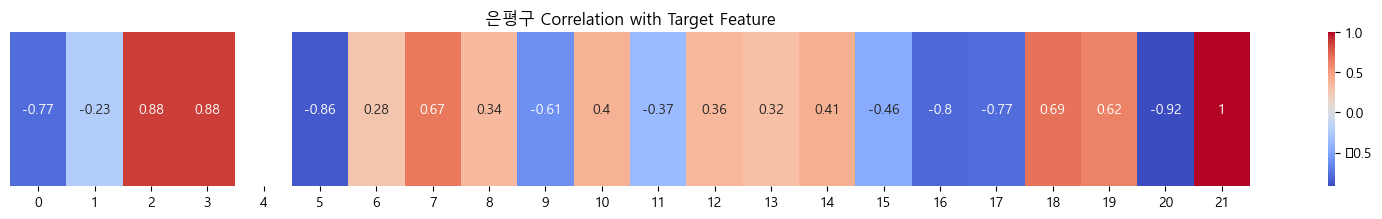

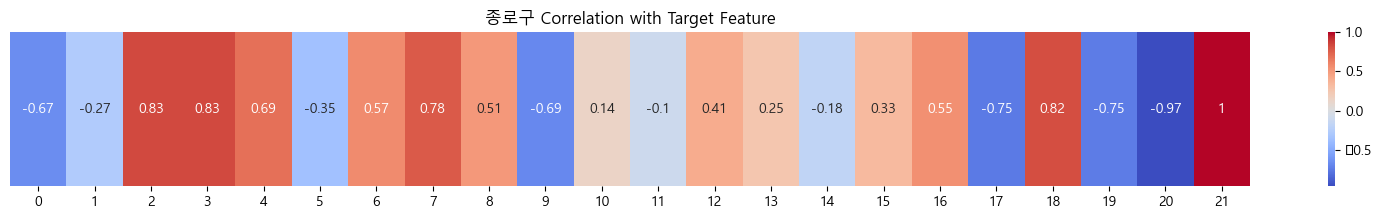

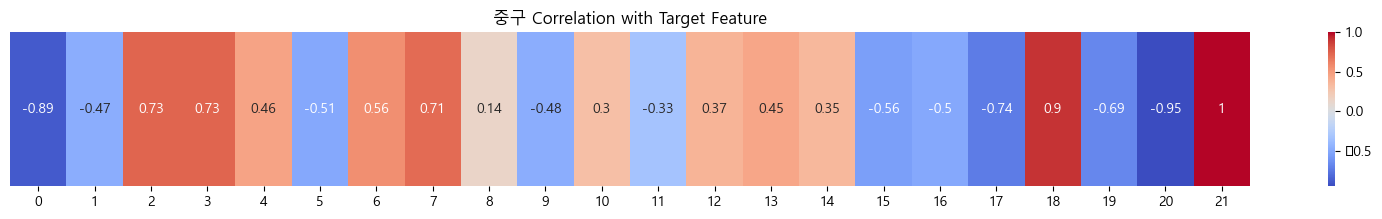

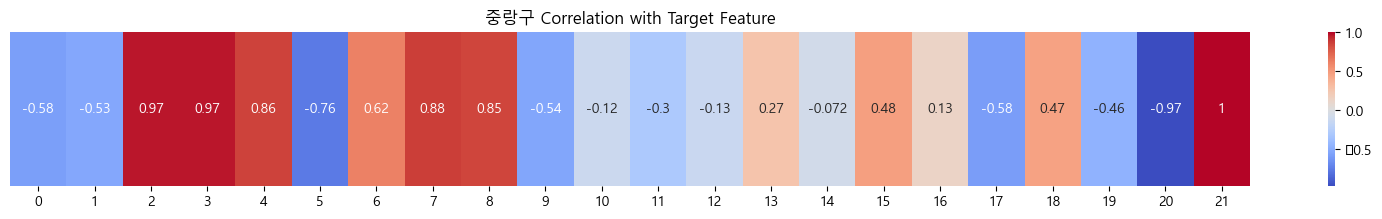

In [172]:
# Seaborn으로 상관관계 시각화

for key in scaled_jachi_grouped_dict.keys():
    fig = plt.figure(figsize = (20,2))
    sns.heatmap([Correlation_occurance_dict[key]], annot=True, cmap='coolwarm', 
                xticklabels=True, yticklabels=False)
    plt.title(f'{key} Correlation with Target Feature')
    plt.show()


- 0:발생	
- 1:검거율	
- 2:cctv	
- 3:인구	
- 4:인구밀도	
- 5:파출소현황	
- 6:경찰관	
- 7: 행복지수	
- 8:월간 음주율	
- 9:우울감 경험률	
- 10:지가변동평균	
- 11:평균기온	
- 12:최고기온	
- 13:평균최고기온	
- 14:최저기온	
- 15:평균최저기온	
- 16:평균풍속	
- 17:최대 순간 풍속	
- 18:강수량합	
- 19:유흥주점	
- 20:외국인 인구	
- 21:평균연령


# Support Vector Machine

In [175]:
import sklearn.svm as svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [176]:
year = 22
 
X = ohe_aa_df.loc[ohe_aa_df['연도'] < year].drop(columns=['발생']) # 14년부터 21년도 설정
y = ohe_aa_df.loc[ohe_aa_df['연도'] < year]['발생'] # 22년 발생 건수 예측을 위해 y축 '발생' 설정

In [177]:
correlation_matrix = X.drop(columns=['자치구']).corr().abs()

upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
selected_features = [column for column in upper.columns if any(upper[column] > 0.1)]

X_selected = X[selected_features]


In [178]:
ss = MinMaxScaler()

X_selected_normalized = ss.fit_transform(X_selected)

## 21년까지 학습

In [179]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_selected_normalized, y, test_size=0.2, random_state=0)

In [180]:
svm_clf = svm.SVR(kernel="poly", degree=15, epsilon=1.5)  # SVR 생성

In [181]:
# SVM 학습
svm_clf.fit(X_selected_normalized, y)

SVR(degree=15, epsilon=1.5, kernel='poly')

In [182]:
pred = svm_clf.predict(X_valid)

In [183]:
print(mean_squared_error(pred, Y_valid)**(1/2))  # RMSE
print(r2_score(pred, Y_valid))

634.8561557678566
0.7199323411455146


In [188]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'kernel': ['poly'],
    'degree': [3, 5, 10, 15],
    'epsilon': [0.1, 0.5, 1.0, 1.5]
}

# SVM regressor 만들기
svm_regressor = svm.SVR()

# 그리드서치 CV 만들기
grid_search = GridSearchCV(svm_regressor, param_grid, scoring='neg_mean_squared_error', cv=5)

# 그리드서치CV 찾기
grid_search.fit(X_selected_normalized, y)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'degree': 10, 'epsilon': 0.1, 'kernel': 'poly'}


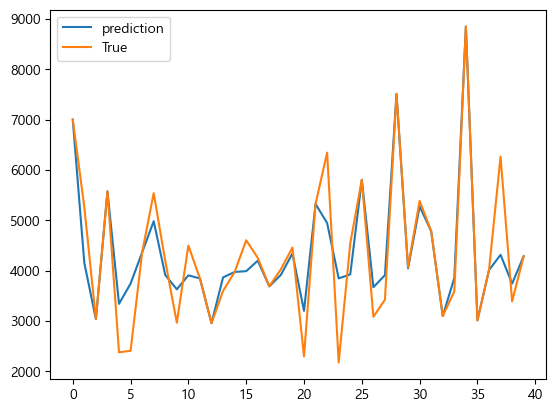

In [187]:
# 시각화
x_axis = np.arange(0, len(Y_valid))


plt.plot(x_axis ,pred, label = "prediction")
plt.plot(x_axis, Y_valid, label = "True" ) 
plt.legend()
plt.show()

## 22년 예측

In [189]:
year = 22

X_test = ohe_aa_df.loc[ohe_aa_df['연도'] == year].drop(columns=['발생'])
y_test = ohe_aa_df.loc[ohe_aa_df['연도'] == year]['발생']

In [190]:
X_test_selected = X_test[selected_features]
X_test_normalized = ss.transform(X_test_selected)

In [191]:
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_selected.columns)

In [192]:
pred = svm_clf.predict(X_test_normalized)

In [193]:
print("Predictions:", pred)

Predictions: [4066.67856554 3918.6038011  3590.45025308 1403.76822914 3816.67004981
 3643.78039917 3691.19811203 2957.09852197 3489.90051252 3800.95696882
 3912.19783754 3889.31772993 3893.84571173 4163.93024492 3206.42576446
 4149.72659874 4449.82022778  709.73734769 3941.22044619 3585.72973458
 4104.54837728 4972.09989226 5381.6972724  5061.86936278 3774.10466415]


In [194]:
print("RMSE:", mean_squared_error(pred, y_test)**(1/2)) #RMSE
print("R-squared:", r2_score(pred, y_test))

RMSE: 834.9377578962531
R-squared: 0.23790673119889372


## 시각화

In [68]:
crime_pred = pd.DataFrame(pred)

In [69]:
crime_pred = crime_pred.rename(columns={0: '예측 발생'})

In [70]:
crime_pred2 = pd.concat([aa.tail(25).reset_index(drop=True), crime_pred.reset_index(drop=True)], axis=1)

In [71]:
crime_pred2.head()

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령,예측 발생
0,22,종로구,3138,1.046526,207,152211,6365,26,1080,6.90,...,18.0,-13.7,9.2,2.4,17.925,1775.3,291,9106,45.6,4066.678566
1,22,중구,3071,0.690003,137,130785,13131,19,1019,6.44,...,16.9,-15.8,8.2,2.5,21.600,1452.5,263,9288,46.1,3918.603801
2,22,용산구,2967,0.705426,464,233284,10668,13,806,6.50,...,18.4,-12.4,9.8,1.9,18.400,1699.0,116,14332,44.4,3590.450253
3,22,성동구,2194,0.727894,232,288234,17136,16,649,6.99,...,18.8,-12.9,11.0,1.9,19.900,1727.5,59,6682,43.8,1403.768229
4,22,광진구,3619,0.690246,273,351252,20586,13,751,6.53,...,18.4,-12.9,9.3,1.5,12.400,1918.0,83,12631,43.3,3816.670050


<Figure size 1000x500 with 0 Axes>

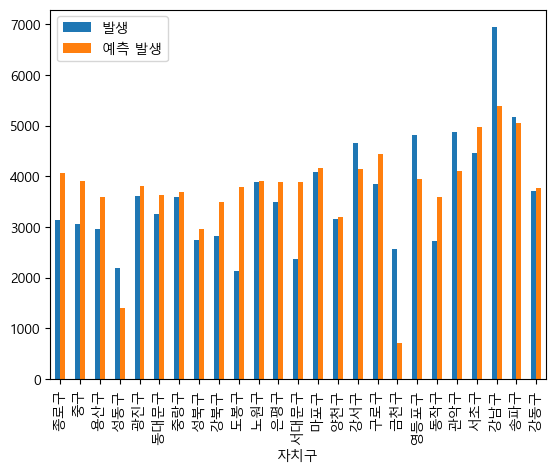

In [72]:
plt.figure(figsize=(10, 5))  
crime_pred2.plot(x="자치구",y=["발생","예측 발생"],kind="bar")
plt.show()

# Dense Layer

In [73]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Dense(units=32, activation='relu', input_shape=(46,))) # 32개 출력 뉴런, Relu 활성화 함수 사용
model.add(layers.Dense(units=16, activation='relu')) # 16개 출력 뉴런, Relu 활성화 함수 사용
model.add(layers.Dense(units=1, activation='linear')) # 1개 출력 뉴런, 동일 값 출력

optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

model.fit(X_train, Y_train, epochs=150, validation_split=0.2)

Epoch 1/150
4/4 [==============================] - 1s 64ms/step - loss: 19172920.0000 - mae: 4204.4043 - val_loss: 24024936.0000 - val_mae: 4667.3047
Epoch 2/150
4/4 [==============================] - 0s 14ms/step - loss: 19164760.0000 - mae: 4203.4580 - val_loss: 24010788.0000 - val_mae: 4665.8076
Epoch 3/150
4/4 [==============================] - 0s 18ms/step - loss: 19149032.0000 - mae: 4201.6094 - val_loss: 23984134.0000 - val_mae: 4663.0112
Epoch 4/150
4/4 [==============================] - 0s 18ms/step - loss: 19120692.0000 - mae: 4198.2334 - val_loss: 23937696.0000 - val_mae: 4658.1406
Epoch 5/150
4/4 [==============================] - 0s 17ms/step - loss: 19072252.0000 - mae: 4192.5122 - val_loss: 23863100.0000 - val_mae: 4650.3105
Epoch 6/150
4/4 [==============================] - 0s 16ms/step - loss: 18996262.0000 - mae: 4183.5845 - val_loss: 23750600.0000 - val_mae: 4638.4717
Epoch 7/150
4/4 [==============================] - 0s 17ms/step - loss: 18884372.0000 - mae: 4170.31

4/4 [==============================] - 0s 15ms/step - loss: 297443.2500 - mae: 422.0348 - val_loss: 515167.3125 - val_mae: 546.8411
Epoch 113/150
4/4 [==============================] - 0s 13ms/step - loss: 291613.6250 - mae: 417.7118 - val_loss: 511094.4375 - val_mae: 544.7924
Epoch 114/150
4/4 [==============================] - 0s 15ms/step - loss: 286899.5000 - mae: 413.2608 - val_loss: 507085.4688 - val_mae: 542.6873
Epoch 115/150
4/4 [==============================] - 0s 13ms/step - loss: 281854.0000 - mae: 409.2496 - val_loss: 501852.1562 - val_mae: 540.2737
Epoch 116/150
4/4 [==============================] - 0s 15ms/step - loss: 277144.3750 - mae: 405.6402 - val_loss: 493866.3125 - val_mae: 537.2867
Epoch 117/150
4/4 [==============================] - 0s 14ms/step - loss: 272831.1875 - mae: 402.3583 - val_loss: 487846.0625 - val_mae: 534.7019
Epoch 118/150
4/4 [==============================] - 0s 13ms/step - loss: 268377.1875 - mae: 399.0658 - val_loss: 481468.6875 - val_mae: 5

In [74]:
predict = model.predict(X_valid)

2/2 [==============================] - 0s 2ms/step


In [75]:
print(mean_squared_error(predict,Y_valid)**(1/2)) #RMSE
print(r2_score(predict,Y_valid))

620.1397080409349
0.7133643472954276


In [174]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                1504      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2049 (8.00 KB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


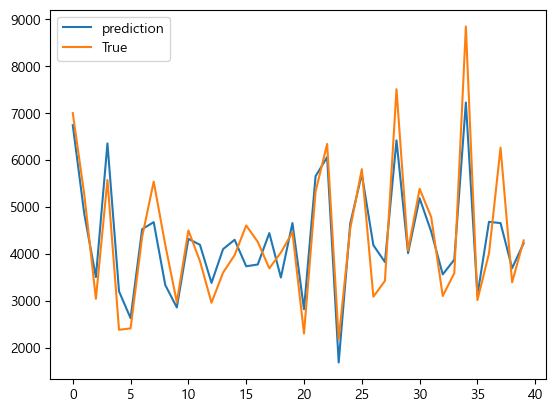

In [76]:
# 시각화
x_axis = np.arange(0, len(Y_valid))


plt.plot(x_axis ,predict, label = "prediction")
plt.plot(x_axis, Y_valid, label = "True" ) 
plt.legend()
plt.show()

### 22 년도 예측

In [77]:
year = 22

X_test = ohe_aa_df.loc[ohe_aa_df['연도'] == year].drop(columns=['발생'])
y_test = ohe_aa_df.loc[ohe_aa_df['연도'] == year]['발생']

In [78]:
X_test = X_test[selected_features] # 상관계수로 컬럼선택한 리스트들로 컬럼 설정

In [79]:
X_test = ss.transform(X_test)

In [80]:
pred = model.predict(X_test)

1/1 [==============================] - 0s 34ms/step


In [81]:
print(mean_squared_error(pred,y_test)**(1/2)) #RMSE
print(r2_score(pred,y_test))

510.38856428605874
0.7600420239705429


##  시각화

In [84]:
crime_dl_pred = pd.DataFrame(pred)

In [86]:
crime_dl_pred = crime_dl_pred.rename(columns={0: '예측 발생'})

In [87]:
crime_dl_pred2 = pd.concat([aa.tail(25).reset_index(drop=True), crime_dl_pred.reset_index(drop=True)], axis=1)

In [88]:
crime_dl_pred2.head()

,연도,자치구,발생,검거율,cctv,인구,인구밀도,파출소현황,경찰관,행복지수,...,평균최고기온,최저기온,평균최저기온,평균풍속,최대 순간 풍속,강수량합,유흥주점,외국인 인구,평균연령,예측 발생
0,22,종로구,3138,1.046526,207,152211,6365,26,1080,6.90,...,18.0,-13.7,9.2,2.4,17.925,1775.3,291,9106,45.6,3935.601807
1,22,중구,3071,0.690003,137,130785,13131,19,1019,6.44,...,16.9,-15.8,8.2,2.5,21.600,1452.5,263,9288,46.1,3865.516602
2,22,용산구,2967,0.705426,464,233284,10668,13,806,6.50,...,18.4,-12.4,9.8,1.9,18.400,1699.0,116,14332,44.4,3184.966309
3,22,성동구,2194,0.727894,232,288234,17136,16,649,6.99,...,18.8,-12.9,11.0,1.9,19.900,1727.5,59,6682,43.8,2768.058105
4,22,광진구,3619,0.690246,273,351252,20586,13,751,6.53,...,18.4,-12.9,9.3,1.5,12.400,1918.0,83,12631,43.3,4163.741211


<Figure size 1000x500 with 0 Axes>

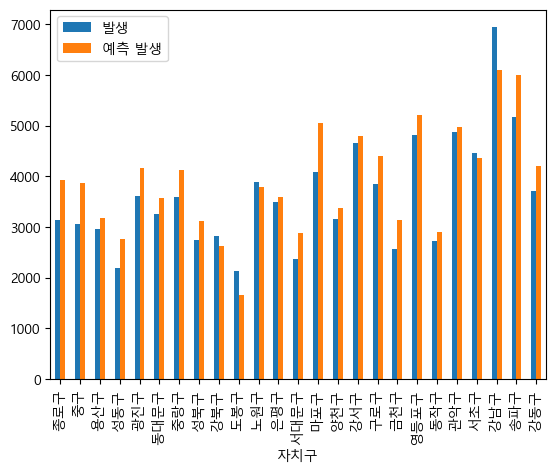

In [89]:
plt.figure(figsize=(10, 5))  
crime_dl_pred2.plot(x="자치구",y=["발생","예측 발생"],kind="bar")
plt.show()